Generalization with OOP: The ConBacktester Class

Using the ConBacktester Class

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("intraday_pairs.csv", parse_dates = ["time"], index_col = "time")
df

,EURUSD,GBPUSD,EURAUD
time,,,
2018-01-01 22:00:00+00:00,1.201205,1.351705,1.533390
2018-01-02 04:00:00+00:00,1.207055,1.354830,1.540480
2018-01-02 10:00:00+00:00,1.204440,1.357860,1.537980
2018-01-02 16:00:00+00:00,1.205800,1.359180,1.540185
2018-01-02 22:00:00+00:00,1.204690,1.359530,1.542225
...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,1.311810,1.602420
2019-12-30 04:00:00+00:00,1.119940,1.311880,1.600800
2019-12-30 10:00:00+00:00,1.120095,1.311465,1.601165


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EURUSD  2070 non-null   float64
 1   GBPUSD  2074 non-null   float64
 2   EURAUD  2071 non-null   float64
dtypes: float64(3)
memory usage: 64.8 KB


In [9]:
ptc = 0.00007 #assumed trading cost per trade

In [13]:
import ConBacktester as Con

In [35]:
tester = Con.ConBacktester("EURUSD", "2018-01-01", "2019-12-31", ptc)

In [37]:
tester

ConBacktester(symbol = EURUSD, start = 2018-01-01, end = 2019-12-31)

In [39]:
tester.test_strategy()

(0.963517, 0.035345)

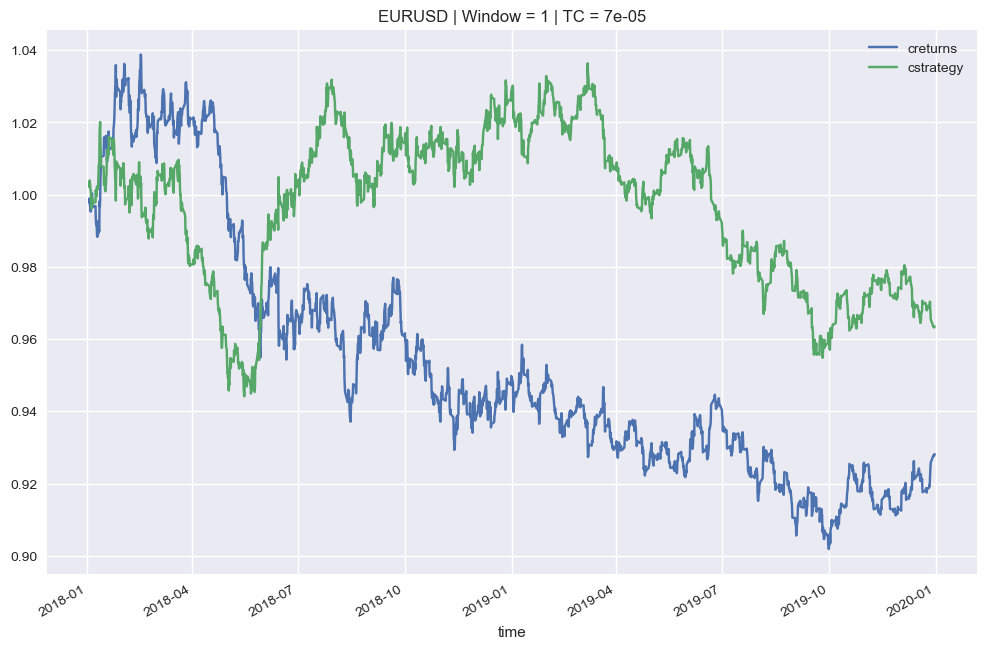

In [41]:
tester.plot_results()

In [43]:
tester.results

,price,returns,position,strategy,trades,creturns,cstrategy
time,,,,,,,
2018-01-02 10:00:00+00:00,1.204440,-0.002169,1.0,0.002169,0.0,0.997834,1.002171
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,0.000989,2.0,0.998960,1.003162
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000781,2.0,0.998041,1.003946
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.0,0.997324,1.003225
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.0,0.996106,1.002000
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.0,0.927812,0.963413
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.0,0.927828,0.963396
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.0,0.927957,0.963262


In [50]:
tester.optimize_parameter((1, 500, 1))

(51, 1.262038)

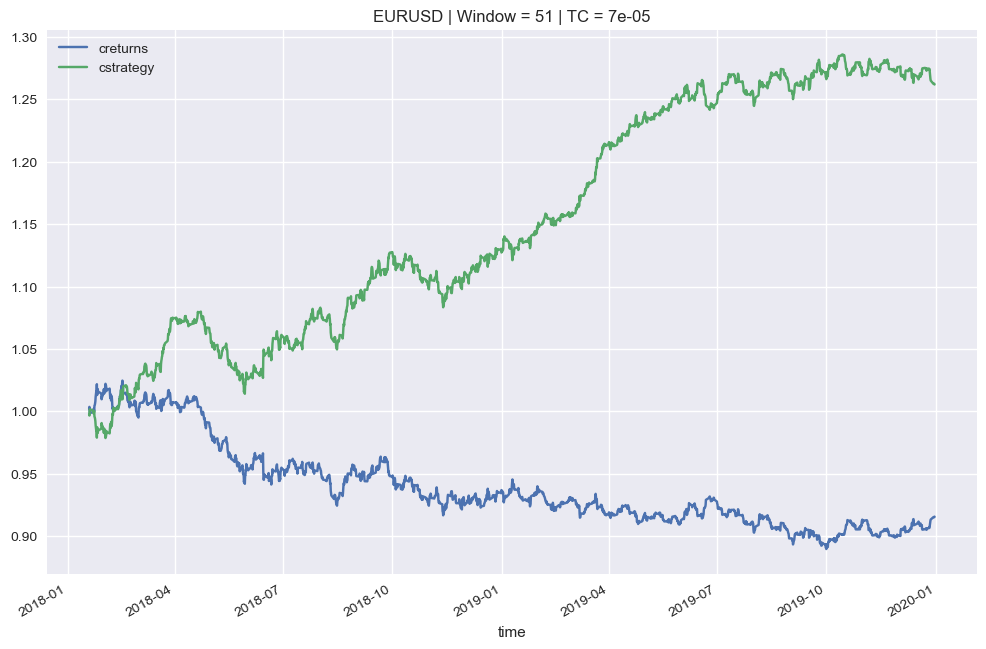

In [52]:
tester.plot_results()

In [54]:
tester.results_overview

,window,performance
0,1,0.963517
1,2,0.948640
2,3,1.018994
3,4,0.824664
4,5,0.859497
...,...,...
494,495,0.983444
495,496,0.976259
496,497,0.971740
497,498,0.961736


In [58]:
tester.results_overview.nlargest(10, "performance") # what are ten best performances (as seen it is window 51 nad 44)

,window,performance
50,51,1.262038
43,44,1.260746
49,50,1.238808
54,55,1.235083
53,54,1.234555
52,53,1.231764
55,56,1.228589
37,38,1.216351
51,52,1.214277
44,45,1.204657


In [60]:
tester.results_overview.nsmallest(10, "performance") # 10 worst performances

,window,performance
3,4,0.824664
4,5,0.859497
6,7,0.884717
8,9,0.884933
10,11,0.895513
5,6,0.913512
9,10,0.916414
7,8,0.917729
255,256,0.921709
257,258,0.924776


In [64]:
tester = Con.ConBacktester("GBPUSD", "2018-01-01", "2019-12-31", 0)

In [66]:
tester.test_strategy()

(1.079377, 0.110492)

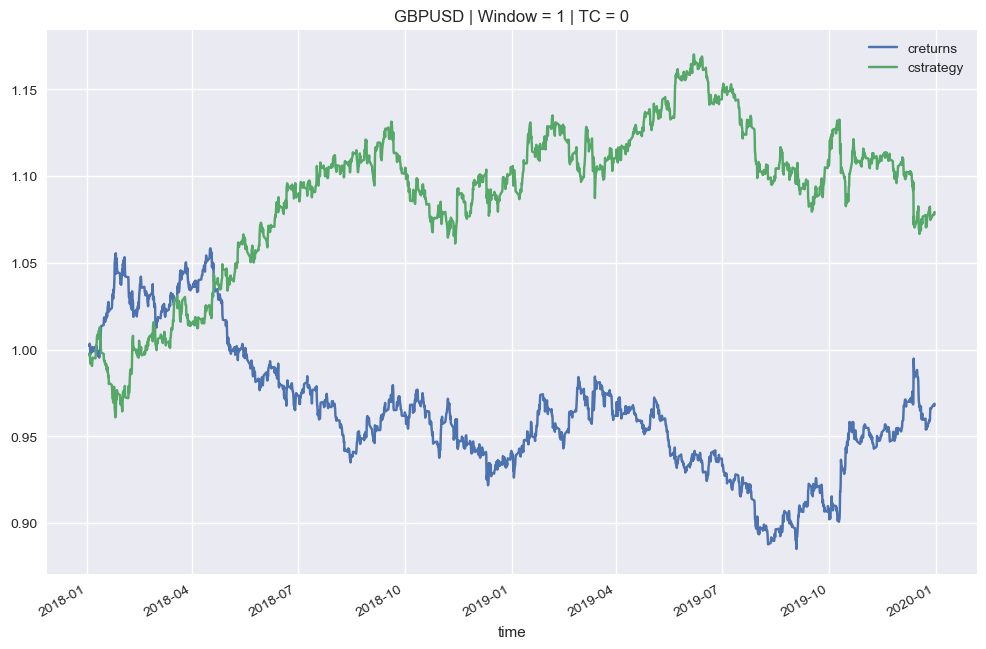

In [68]:
tester.plot_results()

In [70]:
tester.results

,price,returns,position,strategy,trades,creturns,cstrategy
time,,,,,,,
2018-01-02 10:00:00+00:00,1.357860,0.002234,-1.0,-0.002234,0.0,1.002236,0.997769
2018-01-02 16:00:00+00:00,1.359180,0.000972,-1.0,-0.000972,0.0,1.003211,0.996800
2018-01-02 22:00:00+00:00,1.359530,0.000257,-1.0,-0.000257,0.0,1.003469,0.996543
2018-01-03 04:00:00+00:00,1.358605,-0.000681,1.0,0.000681,2.0,1.002786,0.997221
2018-01-03 10:00:00+00:00,1.351485,-0.005254,1.0,-0.005254,0.0,0.997531,0.991995
...,...,...,...,...,...,...,...
2019-12-29 22:00:00+00:00,1.311810,0.002484,-1.0,0.002484,2.0,0.968247,1.078098
2019-12-30 04:00:00+00:00,1.311880,0.000053,-1.0,-0.000053,0.0,0.968299,1.078041
2019-12-30 10:00:00+00:00,1.311465,-0.000316,1.0,0.000316,2.0,0.967992,1.078382


In [72]:
tester.results.trades.value_counts()

trades
2.0    1056
0.0    1012
1.0       4
Name: count, dtype: int64

In [76]:
tester.optimize_parameter((1, 500, 1)) # optimes parameter with the highest yield

(56, 1.21961)

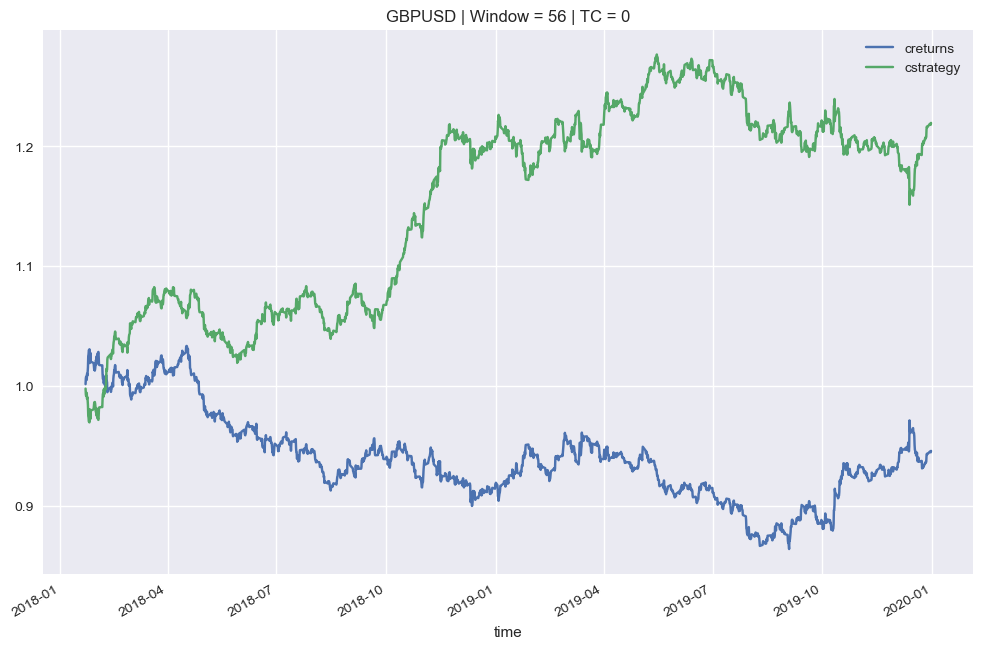

In [78]:
tester.plot_results()

In [80]:
tester.results.trades.value_counts()

trades
0.0    1900
2.0     117
Name: count, dtype: int64